In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Inputs and outputs data sets

In [33]:
df = pd.read_csv('NewParameter_Combinations_ML.csv')

In [34]:
df.head()

,Ha,M,m,beta,Sc_N,Sc_C,F''(0),|- G' (0) |,[ -N'(0) ],[-C'(0) ]
0,0.0,0.0,0,0.0,385.50,500,0.2464,1.026,3.1071,3.4339
1,0.0,0.0,0,0.0,385.50,750,0.2464,1.026,3.1071,4.0009
2,0.0,0.0,0,0.0,385.50,1000,0.2464,1.026,3.1071,4.4507
3,0.0,0.0,0,0.0,1522.25,500,0.2464,1.026,5.1887,3.4335
4,0.0,0.0,0,0.0,1522.25,750,0.2464,1.026,5.1889,3.9994


In [35]:
X = df.iloc[:, 0:6]
y = df.iloc[:, 6:]

In [36]:
X, y

(      Ha    M  m  beta     Sc_N  Sc_C
 0    0.0  0.0  0   0.0   385.50   500
 1    0.0  0.0  0   0.0   385.50   750
 2    0.0  0.0  0   0.0   385.50  1000
 3    0.0  0.0  0   0.0  1522.25   500
 4    0.0  0.0  0   0.0  1522.25   750
 ..   ...  ... ..   ...      ...   ...
 724  3.0  5.0  2   1.0  1522.25   750
 725  3.0  5.0  2   1.0  1522.25  1000
 726  3.0  5.0  2   1.0  2659.00   500
 727  3.0  5.0  2   1.0  2659.00   750
 728  3.0  5.0  2   1.0  2659.00  1000
 
 [729 rows x 6 columns],
      F''(0)  |- G' (0) |   [ -N'(0) ]  [-C'(0) ]
 0    0.2464       1.0260       3.1071     3.4339
 1    0.2464       1.0260       3.1071     4.0009
 2    0.2464       1.0260       3.1071     4.4507
 3    0.2464       1.0260       5.1887     3.4335
 4    0.2464       1.0260       5.1889     3.9994
 ..      ...          ...          ...        ...
 724  1.8580       0.2641       6.9562    34.1094
 725  1.8580       0.2641       6.9562    43.4283
 726  1.8580       0.2641       8.3993    22.8672
 727 

# 2. Input Data Visualization

### A. Correlation between inputs and outputs

In [32]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# df_all = pd.concat([X, y], axis=1)
# corr = df_all.corr().loc[X.columns, y.columns]  # input vs output block only

# plt.figure(figsize=(6,4))
# sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
# #plt.title("Correlation between Inputs and Outputs")
# plt.savefig('input_output_correlation_2.eps',format = 'eps', dpi = 300, bbox_inches = 'tight')
# plt.show()

In [33]:
# plt.figure(figsize=(4,3))
# cp = plt.tricontourf(X["Ha"], X["m"], y["F''(0)"], cmap="viridis", levels=20)
# plt.colorbar(cp, label="F''(0)")
# plt.scatter(X["Ha"], X["m"], c="red", s=20)
# plt.xlabel("Ha")
# plt.ylabel("m")
# plt.title("Contour: F''(0) vs Ha & m")
# plt.show()



In [34]:
# df_plot = pd.DataFrame({"Ha": X["Ha"], "m": X["m"], "F": y["F''(0)"]})
# pivot_df = df_plot.pivot_table(values="F", index="Ha", columns="m")

# sns.heatmap(pivot_df, cmap="viridis")
# plt.title("Heatmap of F''(0)")
# plt.show()


# 3. Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 4. Scaling 
### No improvement 

In [7]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(X_train)


# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [100]:
# # ## Converting into pandas data frame

# X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# #X_train_scaled

# 5. Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [81]:
poly = PolynomialFeatures(degree = 4, include_bias=False)

# transform training and test sets
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# build regression model

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

LinearRegression()

In [82]:
## Prediction
y_pred_poly = poly_lr.predict(X_test_poly)


y_pred_poly = pd.DataFrame(y_pred_poly, columns = y_test.columns)
y_pred_poly

,F''(0),|- G' (0) |,[ -N'(0) ],[-C'(0) ]
0,0.654540,1.219028,5.930817,39.438561
1,1.986084,0.387439,6.596246,33.310512
2,2.277534,0.323342,8.028604,20.039176
3,1.969586,0.305431,9.497473,26.907395
4,0.602761,1.285674,7.507060,4.461354
...,...,...,...,...
141,0.168689,1.024066,2.766036,85.122180
142,1.608011,1.412226,12.771533,7.987981
143,0.036419,1.700887,1.478447,38.679846
144,2.226990,0.336865,11.329339,11.624419


## 5.1 Model save and import

In [1]:
import joblib
joblib.dump(poly_lr, "poly_lr_model.pkl")
print("✅ Model saved as poly_lr_model.pkl")



# Load model back later
poly_lr_loaded = joblib.load("poly_lr_model.pkl")
print("✅ Model loaded successfully")

# You can now use it for prediction
y_pred_load = poly_lr_loaded.predict(X_test_poly)
# print(y_pred_load)

NameError: name 'poly_lr' is not defined

## 5.2. Coefficients and intercept

In [59]:
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet

# Prepare PDF
doc = SimpleDocTemplate("coefficients.pdf", pagesize=A4)
elements = []
styles = getSampleStyleSheet()

data = [["Feature", "Coefficient"]]  # header row

if coefficients.ndim == 1:
    for name, coef in zip(feature_names, coefficients):
        data.append([name, f"{coef:.4f}"])
    data.append(["Intercept", f"{intercept:.4f}"])
else:
    for output_idx in range(coefficients.shape[0]):
        data.append([f"=== Output {output_idx+1} ===", ""])
        for name, coef in zip(feature_names, coefficients[output_idx]):
            data.append([name, f"{coef:.4f}"])
        data.append(["Intercept", f"{intercept[output_idx]:.4f}"])

# Create table
table = Table(data, colWidths=[200, 200])
table.setStyle(TableStyle([
    ("BACKGROUND", (0,0), (-1,0), colors.grey),
    ("TEXTCOLOR", (0,0), (-1,0), colors.whitesmoke),
    ("ALIGN", (0,0), (-1,-1), "CENTER"),
    ("GRID", (0,0), (-1,-1), 0.5, colors.black),
]))
elements.append(table)

# Build PDF
doc.build(elements)
print("✅ Saved as coefficients.pdf")


✅ Saved as coefficients.pdf


In [66]:

# coefficients = poly_lr.coef_
# intercept = poly_lr.intercept_

# # Get feature names (expanded polynomial terms)
# feature_names = poly.get_feature_names_out(['Ha', 'M', 'm', 'beta', 'Sc_N', 'Sc_C'])

# # Case 1: Single output regression
# if coefficients.ndim == 1:
#     for name, coef in zip(feature_names, coefficients):
#         print(f"{name}: {coef:.4f}")
#     print(f"Intercept: {intercept:.4f}")

# # Case 2: Multiple outputs regression
# else:
#     for output_idx in range(coefficients.shape[0]):
#         print(f"\n=== Output {output_idx+1} ===")
#         for name, coef in zip(feature_names, coefficients[output_idx]):
#             print(f"{name}: {coef:.4f}")
#         print(f"Intercept: {intercept[output_idx]:.4f}")



## 5.3. Unseen data prediction

In [75]:
X_new = np.array([[1, 2, 0.5, 0.3, 500, 600]]) # shape (1,6)
# X_new_scaled = scaler.transform(X_new)
# print(X_new_scaled)
x_new_poly = poly.transform(X_new)


output = poly_lr.predict(x_new_poly)

print(output)



[[ 0.97987533  0.95823229  5.4628888  16.60442037]]


C:\Users\pkvij\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## 5.4. Actual and Prediction Figure

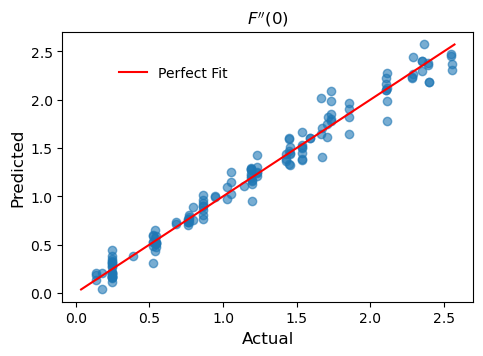

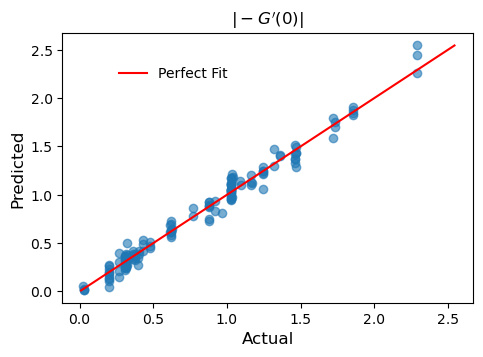

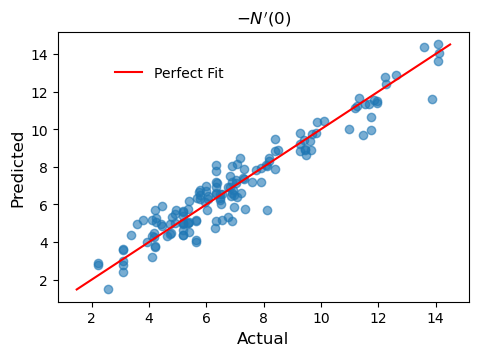

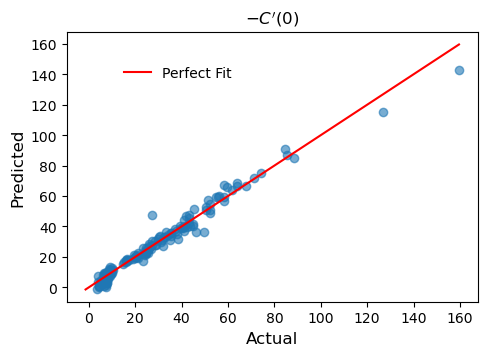

In [85]:
for col in y_test.columns:
    actual = y_test[col]
    pred_poly   = y_pred_poly[col]

    plt.figure(figsize=(5.3,3.5))
    plt.scatter(actual, pred_poly, alpha=0.6)
    plt.xlabel(f"Actual", fontsize  = 12)
    plt.ylabel(f"Predicted", fontsize  = 12)
    plt.title(f"${col.strip('[ ]')}$")

    low = min(actual.min(), pred_poly.min())
    high = max(actual.max(), pred_poly.max())
    plt.plot([low, high], [low, high], 'r', label = 'Perfect Fit')
    
    plt.legend(loc='center', bbox_to_anchor=(0.27, 0.85), frameon = False)
    
    plt.show()


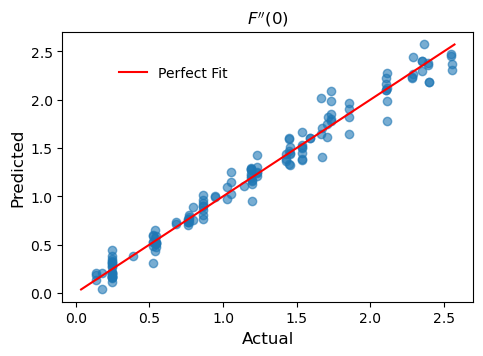

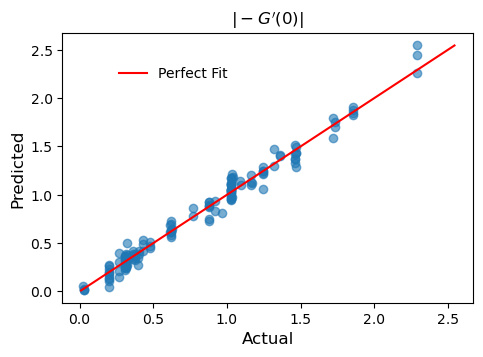

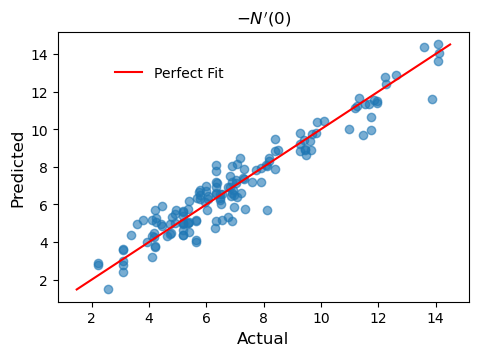

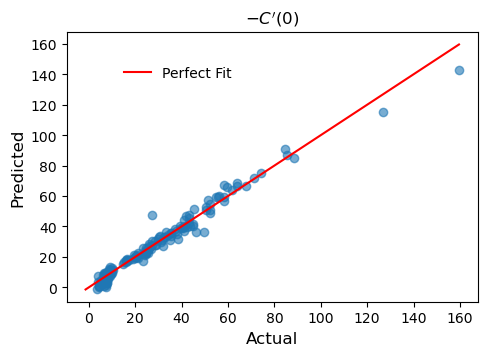

In [86]:
import matplotlib.pyplot as plt
import os
import re

# Create a directory to save the figures if it doesn't exist
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

for col in y_test.columns:
    actual = y_test[col]
    pred_poly = y_pred_poly[col]

    plt.figure(figsize=(5.3, 3.5))
    plt.scatter(actual, pred_poly, alpha=0.6)
    plt.xlabel(f"Actual", fontsize=12)
    plt.ylabel(f"Predicted", fontsize=12)
    plt.title(f"${col.strip('[ ]')}$")

    low = min(actual.min(), pred_poly.min())
    high = max(actual.max(), pred_poly.max())
    plt.plot([low, high], [low, high], 'r', label='Perfect Fit')
    
    plt.legend(loc='center', bbox_to_anchor=(0.27, 0.85), frameon=False)
    
    # Sanitize the filename by removing/replacing invalid characters
    sanitized_col = re.sub(r'[<>:"/\\|?*\'()]', '_', col.strip('[ ]'))
    sanitized_col = re.sub(r'\s+', '_', sanitized_col)  # Replace spaces with underscores
    sanitized_col = sanitized_col.strip('_')  # Remove leading/trailing underscores
    
    filename = f"{sanitized_col}.png"
    filepath = os.path.join(output_dir, filename)
    
    # Save the figure before showing it
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()  # Close the figure to free up memory

## 5.5. Error metrics

In [180]:

n = len(y_test)     # number of samples
p = X_train.shape[1]  # number of predictors (features used in regression)

results = pd.DataFrame({
    "MAE": [mean_absolute_error(y_test[col], y_pred_poly[col]) for col in y_test.columns],
    "MSE": [mean_squared_error(y_test[col], y_pred_poly[col]) for col in y_test.columns],
    "R2": [r2_score(y_test[col], y_pred_poly[col]) for col in y_test.columns],
    "Adj_R2": [
        (1 - (((1 - r2_score(y_test[col], y_pred_poly[col])) * (n - 1)) / (n - p - 1)))
        for col in y_test.columns
    ]
}, index=y_test.columns)

print(results)


                  MAE       MSE        R2    Adj_R2
F''(0)       0.064293  0.007135  0.985624  0.985003
|- G' (0) |  0.058906  0.007173  0.974473  0.973371
 [ -N'(0) ]  0.593390  0.612453  0.928020  0.924913
[-C'(0) ]    1.845358  7.418462  0.987279  0.986729


## 5.6. MAE & MSE Figures 

In [3]:
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

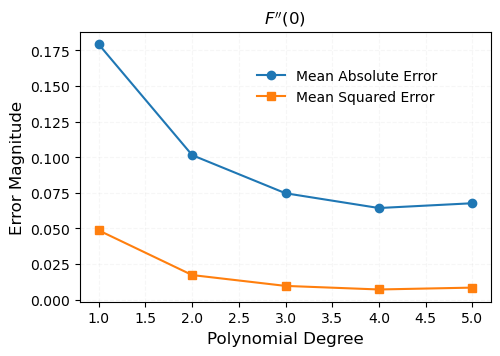

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

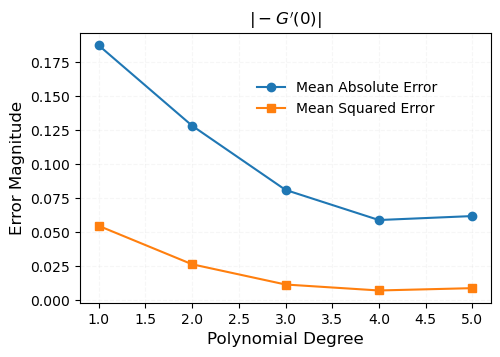

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

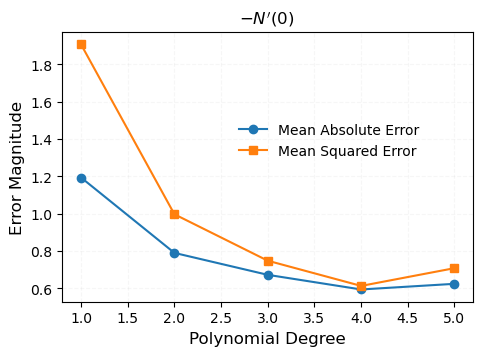

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

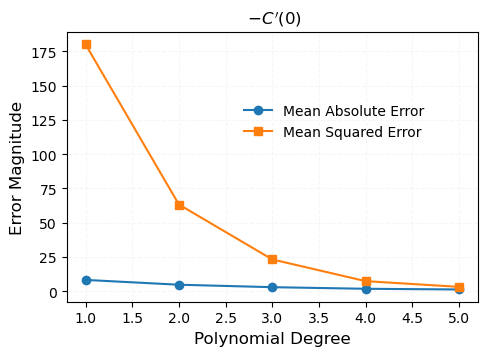

In [3]:
poly_degree = [1, 2, 3, 4, 5]

## 1 MAE
MAE_skin_friction_r =     [0.179071,0.101404,0.074657, 0.064293, 0.067647]
MAE_skin_friction_theta = [0.187088, 0.128117, 0.081019,0.058906,0.061812]
MAE_Microb =              [1.192868, 0.789291, 0.671778, 0.593390,0.623678 ]
MAE_Oxygen =              [8.310112, 4.811598, 3.013104,1.845358,1.344431]

## 1 MSE
MSE_skin_friction_r =     [0.048567, 0.017249, 0.009640, 0.007135, 0.008431]
MSE_skin_friction_theta = [0.054597, 0.026395, 0.011551, 0.007173, 0.008872]
MSE_Microb =              [1.905865, 0.996245, 0.747417, 0.612453, 0.707573]
MSE_Oxygen =              [179.920618, 63.256342, 23.236899, 7.418462, 3.252459]




############ MAE AND MSE ####################
plt.figure(1)
plt.figure(figsize=(5.3,3.5))
plt.plot(poly_degree, MAE_skin_friction_r, 'o-', label='Mean Absolute Error')
plt.plot(poly_degree, MSE_skin_friction_r, 's-', label='Mean Squared Error')
plt.title(r"$F''(0)$ ")
plt.xlabel('Polynomial Degree',fontsize = 12)
plt.ylabel('Error Magnitude',fontsize = 12)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.91), frameon = False)
plt.grid(True, alpha=0.1, linestyle='--')
plt.savefig('skin_friction_r_error_figure.eps', format = 'eps',  bbox_inches = 'tight', dpi = 300)
plt.show()

plt.figure(2)
plt.figure(figsize=(5.3,3.5))
plt.plot(poly_degree, MAE_skin_friction_theta, 'o-', label='Mean Absolute Error')
plt.plot(poly_degree, MSE_skin_friction_theta, 's-', label='Mean Squared Error')
plt.title(r"$| -G'(0) | $")
plt.xlabel('Polynomial Degree', fontsize = 12)
plt.ylabel('Error Magnitude', fontsize = 12)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.87), frameon = False)
plt.grid(True, alpha=0.1, linestyle='--')
plt.savefig('skin_friction_theta_error_figure.eps', format = 'eps',  bbox_inches = 'tight', dpi = 300)
plt.show()


plt.figure(3)
plt.figure(figsize=(5.3,3.5))
plt.plot(poly_degree, MAE_Microb, 'o-', label='Mean Absolute Error')
plt.plot(poly_degree, MSE_Microb, 's-', label='Mean Squared Error')
plt.title(r"$-N'(0)$ ")
plt.xlabel('Polynomial Degree', fontsize = 12)
plt.ylabel('Error Magnitude', fontsize = 12)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.71), frameon = False)
plt.grid(True, alpha=0.1, linestyle='--')
plt.savefig('Microb_error_figure.eps', format = 'eps',  bbox_inches = 'tight', dpi = 300)
plt.show()


plt.figure(4)
plt.figure(figsize=(5.3,3.5))
plt.plot(poly_degree, MAE_Oxygen, 'o-', label='Mean Absolute Error')
plt.plot(poly_degree, MSE_Oxygen, 's-', label='Mean Squared Error')
plt.title(r" $-C'(0)$ ")
plt.xlabel('Polynomial Degree', fontsize = 12)
plt.ylabel('Error Magnitude', fontsize = 12)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.78), frameon = False)
plt.grid(True, alpha=0.1, linestyle='--')
plt.savefig('oxygen_error_figure.eps', format = 'eps',  bbox_inches = 'tight', dpi = 300)
plt.show()

############ R2 AND Adj. R2  ######################3
# plt.figure(figsize=(5.5,3.6))
# plt.plot(poly_degree, R2_Microb, 'o-', label='MAE', linewidth=2)
# plt.plot(poly_degree, Ad_R2_Microb, 's-', label='MSE', linewidth=2)
# plt.title("Mean Absolute & Squarred Error [ F''(0) ]")
# plt.xlabel('Polynomial degree')
# plt.ylabel('Error Magnitude')
# plt.legend(loc='best', bbox_to_anchor=(0.8, 0.9), frameon = False)
# plt.grid(True, alpha=0.2)
# plt.show()

## 5.7. R2 and Adj R2 Score Figures

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

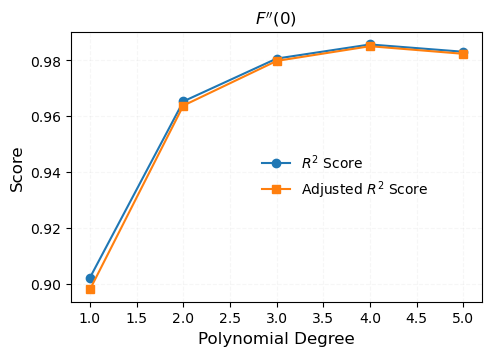

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

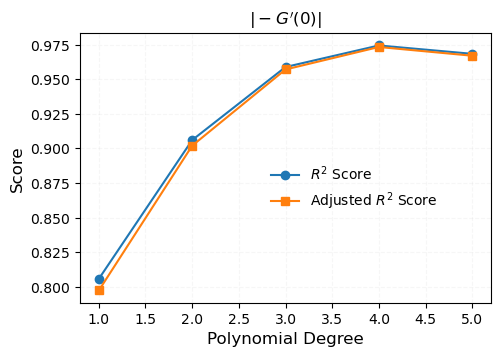

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

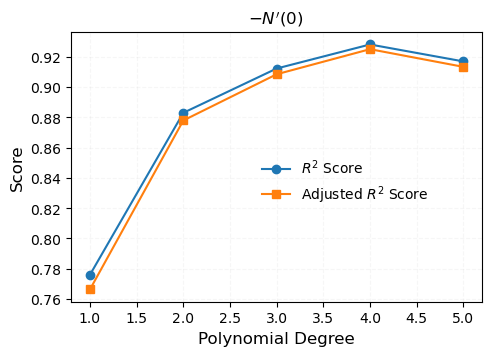

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

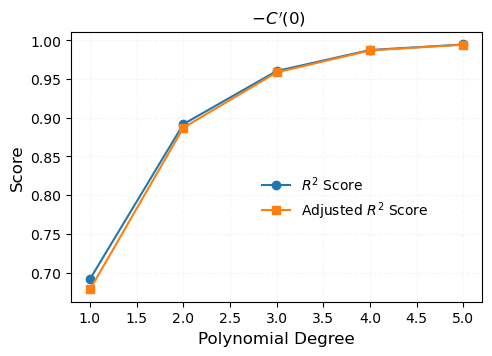

In [4]:
poly_degree = [1, 2, 3, 4, 5]

## 1 R2 Score
R2_skin_friction_r =     [0.902139,0.965245, 0.980576, 0.985624, 0.983012]
R2_skin_friction_theta = [0.805695,0.906064, 0.958892, 0.974473, 0.968425 ]
R2_Microb =              [0.776009, 0.882914, 0.912158, 0.928020, 0.916841]
R2_Oxygen =              [0.691465, 0.891526, 0.960152, 0.987279, 0.994423]

## 1 Adjusted R2 Score
Ad_R2_skin_friction_r =     [0.897915,0.963744, 0.979738, 0.985003, 0.982278]
Ad_R2_skin_friction_theta = [0.797308,0.902009, 0.957117, 0.973371, 0.967062]
Ad_R2_Microb =              [0.766341,0.877860, 0.908367, 0.924913, 0.913251]
Ad_R2_Oxygen =              [0.678147, 0.886843, 0.958432, 0.986729, 0.994182]



############ R2 AND Adj. R2 Score ####################
plt.figure(1)
plt.figure(figsize=(5.3,3.5))
plt.plot(poly_degree, R2_skin_friction_r, 'o-', label='$R^{2}$ Score')
plt.plot(poly_degree, Ad_R2_skin_friction_r, 's-', label='Adjusted $R^{2}$ Score')
plt.title(r"$F''(0)$ ")
plt.xlabel('Polynomial Degree', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.60), frameon = False)
plt.grid(True, alpha=0.1, linestyle='--')
plt.savefig('skin_friction_r_score_figure.eps', format = 'eps',  bbox_inches = 'tight', dpi = 300)
plt.show()

plt.figure(2)
plt.figure(figsize=(5.3,3.5))
plt.plot(poly_degree, R2_skin_friction_theta, 'o-', label='$R^{2}$ Score')
plt.plot(poly_degree, Ad_R2_skin_friction_theta, 's-', label='Adjusted $R^{2}$ Score')
plt.title(r"$| -G'(0) | $")
plt.xlabel('Polynomial Degree', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.56), frameon = False)
plt.grid(True, alpha=0.1, linestyle='--')
plt.savefig('skin_friction_theta_score_figure.eps', format = 'eps',  bbox_inches = 'tight', dpi = 300)
plt.show()


plt.figure(3)
plt.figure(figsize=(5.3,3.5))
plt.plot(poly_degree, R2_Microb, 'o-', label='$R^{2}$ Score')
plt.plot(poly_degree, Ad_R2_Microb, 's-', label='Adjusted $R^{2}$ Score')
plt.title(r"$-N'(0)$ ")
plt.xlabel('Polynomial Degree', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.58), frameon = False)
plt.grid(True, alpha=0.1, linestyle='--')
plt.savefig('microb_score_figure.eps', format = 'eps',  bbox_inches = 'tight', dpi = 300)
plt.show()


plt.figure(4)
plt.figure(figsize=(5.3,3.5))
plt.plot(poly_degree, R2_Oxygen, 'o-', label='$R^{2}$ Score')
plt.plot(poly_degree, Ad_R2_Oxygen, 's-', label='Adjusted $R^{2}$ Score')
plt.title(r" $-C'(0)$ ")
plt.xlabel('Polynomial Degree', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.52), frameon = False)
plt.grid(True, alpha=0.1, linestyle='--')
plt.savefig('oxygen_score_figure.eps', format = 'eps',  bbox_inches = 'tight', dpi = 300)
plt.show()